In [1]:
#Importing Necessary Libraries

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix
%matplotlib inline

In [2]:
# Read/Load the Training dataset

df = pd.read_excel('Training-Data-Sets.xlsx')
df = df.drop('s.no', axis =1)

In [3]:
# Head of the Training Dataset

df.head()

,EQ,Social_Search_Impressions,Social_Search_Working_cost,Digital_Impressions,Digital_Working_cost,Print_Impressions.Ads40,Print_Working_Cost.Ads50,OOH_Impressions,OOH_Working_Cost,SOS_pct,...,Magazine_Impressions_pct,TV_GRP,Competitor1_RPI,Competitor2_RPI,Competitor3_RPI,Competitor4_RPI,EQ_Category,EQ_Subcategory,pct_PromoMarketDollars_Subcategory,RPI_Subcategory
0,718.458667,22256928,56812,7724107,238700,151438,1044,112229070,2133614,5,...,54.17,16.46,105.71,36.13,46.36,71.83,5420048,475559,0.3766,45.77
1,25.521137,4239408,105695,5844288,188902,264008,113582,284597324,1719318,38,...,65.79,15.64,111.79,43.31,47.58,67.90,12155631,371540,0.2515,35.02
2,268.288044,6708500,87686,13008485,19704,150505,38501,807781054,1569740,9,...,45.08,23.91,110.15,38.26,49.26,72.70,11939870,225984,0.3679,46.22
3,209.071599,36835247,70791,2520814,200111,253458,53719,667441334,922723,9,...,75.24,13.06,116.74,39.37,44.21,73.01,7045541,551342,0.0504,38.10
4,3482.169185,23693467,75610,9276779,65532,278877,95178,74045467,1834970,26,...,56.85,40.72,115.18,36.85,45.46,75.84,11488805,254143,0.2219,39.16


In [4]:
# Basic Informations about a dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 38 columns):
EQ                                    12000 non-null float64
Social_Search_Impressions             12000 non-null int64
Social_Search_Working_cost            12000 non-null int64
Digital_Impressions                   12000 non-null int64
Digital_Working_cost                  12000 non-null int64
Print_Impressions.Ads40               12000 non-null int64
Print_Working_Cost.Ads50              12000 non-null int64
OOH_Impressions                       12000 non-null int64
OOH_Working_Cost                      12000 non-null int64
SOS_pct                               12000 non-null int64
Digital_Impressions_pct               12000 non-null int64
CCFOT                                 12000 non-null int64
Median_Temp                           12000 non-null int64
Median_Rainfall                       12000 non-null float64
Fuel_Price                            12000 non-null float64


In [5]:
# Data Types of Each Attributes

df.dtypes

EQ                                    float64
Social_Search_Impressions               int64
Social_Search_Working_cost              int64
Digital_Impressions                     int64
Digital_Working_cost                    int64
Print_Impressions.Ads40                 int64
Print_Working_Cost.Ads50                int64
OOH_Impressions                         int64
OOH_Working_Cost                        int64
SOS_pct                                 int64
Digital_Impressions_pct                 int64
CCFOT                                   int64
Median_Temp                             int64
Median_Rainfall                       float64
Fuel_Price                            float64
Inflation                             float64
Trade_Invest                            int64
Brand_Equity                          float64
Avg_EQ_Price                          float64
Any_Promo_pct_ACV                     float64
Any_Feat_pct_ACV                      float64
Any_Disp_pct_ACV                  

In [6]:
# Shape of Training Dataset

df.shape

(12000, 38)

# As we can see above that the training set data have a shape of (12000,39) and which have two diff data types in features. By using null function, we found that the all the attributes have no NaN values.

In [7]:
# Descriptive Statistics/Five Point Summary of Each Attribute

df.describe().T 

,count,mean,std,min,25%,50%,75%,max
EQ,12000.0,6.380085e+02,1.200110e+03,1.945876e-02,5.760432e+01,2.107325e+02,6.650936e+02,1.855756e+04
Social_Search_Impressions,12000.0,1.962056e+07,1.084298e+07,8.741110e+05,1.021389e+07,1.949458e+07,2.913852e+07,3.827240e+07
Social_Search_Working_cost,12000.0,6.313186e+04,3.451886e+04,3.546000e+03,3.316400e+04,6.288850e+04,9.246175e+04,1.234210e+05
Digital_Impressions,12000.0,6.663405e+06,3.824995e+06,2.344000e+04,3.330268e+06,6.715113e+06,9.956033e+06,1.323874e+07
Digital_Working_cost,12000.0,2.189732e+05,1.240759e+05,3.493000e+03,1.123182e+05,2.182305e+05,3.266312e+05,4.323400e+05
Print_Impressions.Ads40,12000.0,1.944045e+05,8.585742e+04,4.637200e+04,1.201248e+05,1.936095e+05,2.688438e+05,3.422420e+05
Print_Working_Cost.Ads50,12000.0,9.540649e+04,5.504185e+04,4.620000e+02,4.761000e+04,9.558600e+04,1.437898e+05,1.903890e+05
OOH_Impressions,12000.0,4.526812e+08,2.308381e+08,5.435061e+07,2.519760e+08,4.540579e+08,6.557911e+08,8.493609e+08
OOH_Working_Cost,12000.0,1.975918e+06,1.017836e+06,2.374290e+05,1.095344e+06,1.959212e+06,2.854418e+06,3.748194e+06
SOS_pct,12000.0,2.541750e+01,1.447733e+01,1.000000e+00,1.300000e+01,2.500000e+01,3.800000e+01,5.000000e+01


In [8]:
#Measure of Skewness of Numerical Attributes

df.skew(numeric_only = True)

EQ                                    4.695022
Social_Search_Impressions             0.000018
Social_Search_Working_cost            0.015641
Digital_Impressions                  -0.008470
Digital_Working_cost                 -0.003672
Print_Impressions.Ads40               0.009439
Print_Working_Cost.Ads50              0.002998
OOH_Impressions                      -0.011138
OOH_Working_Cost                      0.015905
SOS_pct                               0.010280
Digital_Impressions_pct               0.012110
CCFOT                                -0.007258
Median_Temp                          -0.004946
Median_Rainfall                      -0.004213
Fuel_Price                            0.006624
Inflation                             0.005166
Trade_Invest                         -0.007399
Brand_Equity                          0.006865
Avg_EQ_Price                         -0.019207
Any_Promo_pct_ACV                     0.007006
Any_Feat_pct_ACV                      0.005823
Any_Disp_pct_

# Sales(EQ) looks highly right skewed which defines it has more weights in the left tail of distribution. Some of the features are lightly left skewed and most of the features are very close to normal distribution.

In [9]:
#Checking Nan Values

df.isnull().sum() 

EQ                                    0
Social_Search_Impressions             0
Social_Search_Working_cost            0
Digital_Impressions                   0
Digital_Working_cost                  0
Print_Impressions.Ads40               0
Print_Working_Cost.Ads50              0
OOH_Impressions                       0
OOH_Working_Cost                      0
SOS_pct                               0
Digital_Impressions_pct               0
CCFOT                                 0
Median_Temp                           0
Median_Rainfall                       0
Fuel_Price                            0
Inflation                             0
Trade_Invest                          0
Brand_Equity                          0
Avg_EQ_Price                          0
Any_Promo_pct_ACV                     0
Any_Feat_pct_ACV                      0
Any_Disp_pct_ACV                      0
EQ_Base_Price                         0
Est_ACV_Selling                       0
pct_ACV                               0


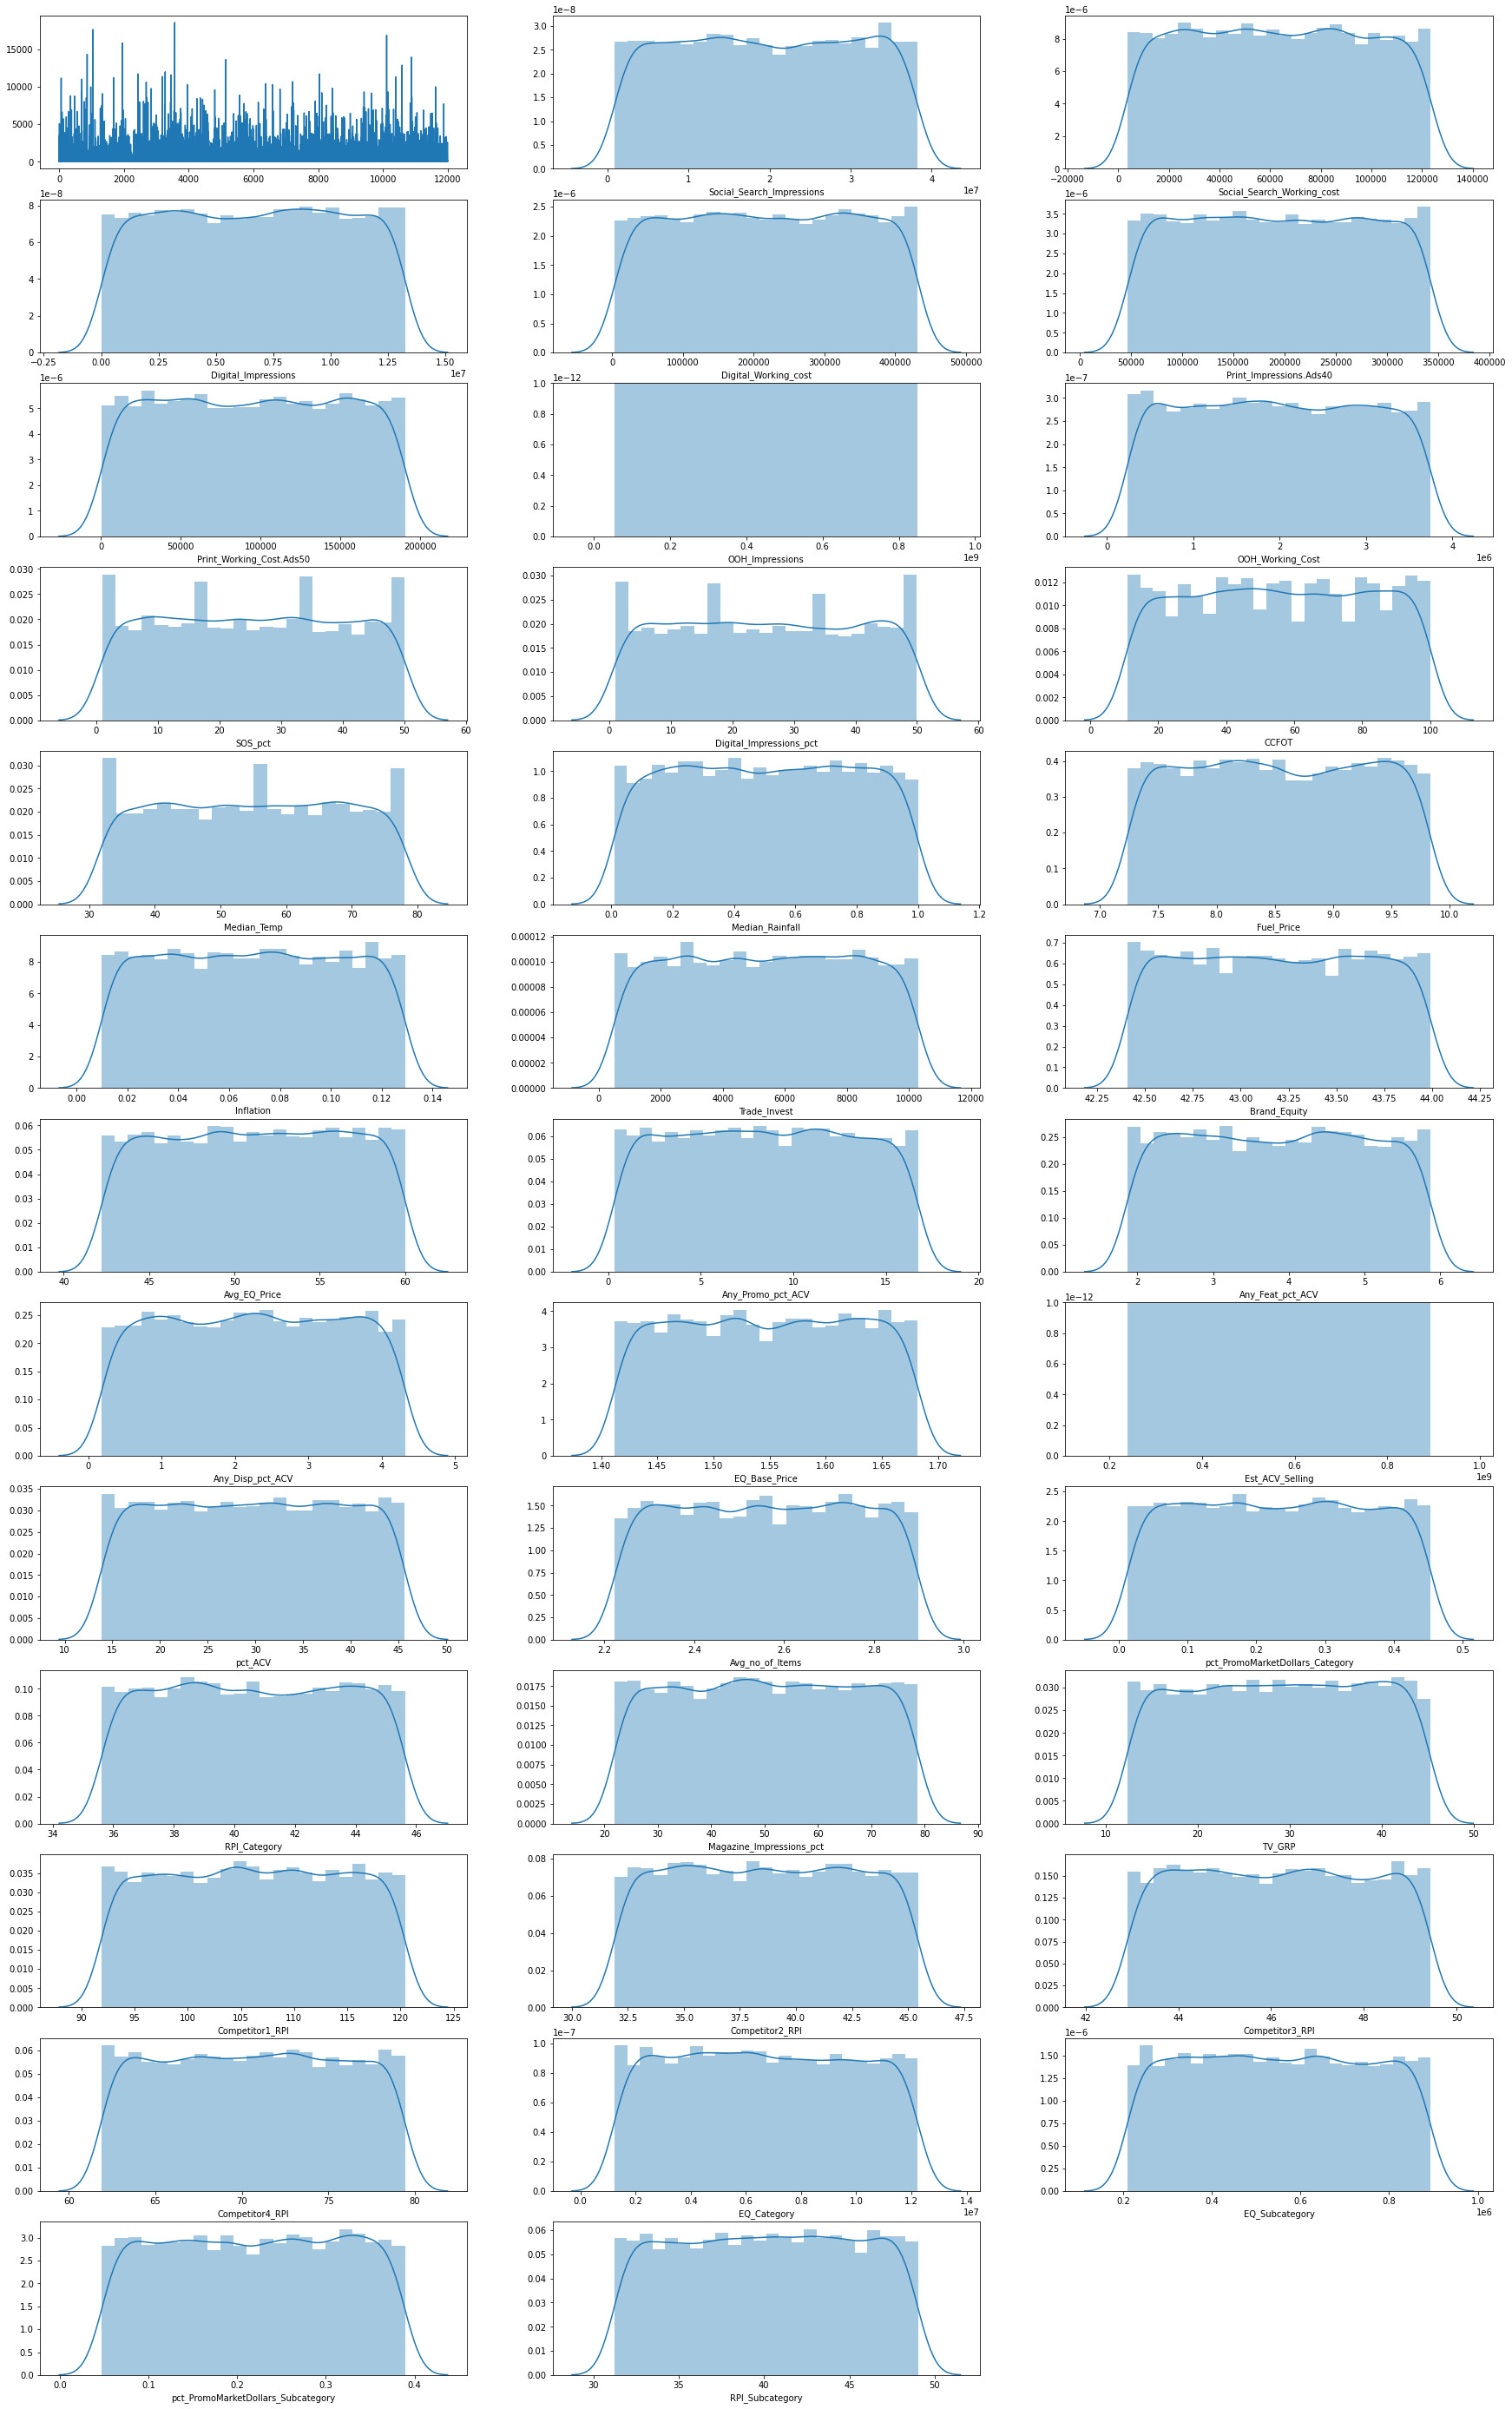

In [10]:
# Univariate Analysis : Visualization of Individual Attributes

plt.figure(figsize= (30,50))  
pos = 1    
for feature in df.columns:   
    plt.subplot(13, 3, pos)   
    if feature in ['EQ']: 
          plt.plot(df[feature])  
    else:
          sns.distplot(df[feature], kde= True ) # Plot histogram for all the continuous attributes
    pos +=1   


# By using plot function target variable (Sales) was plotted but it doen't look like normally distributed, Other than this all of the features are quite normally distributed. 

# The sales variable is right skewed so that it has more weights on left tail of distribution.

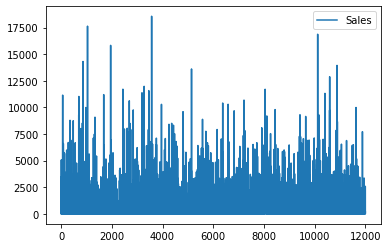

In [11]:
# Plot the Distribution of Target Attribute(TrainSet : Sales) 

plt.plot(df.EQ, label = 'Sales') 
plt.legend()

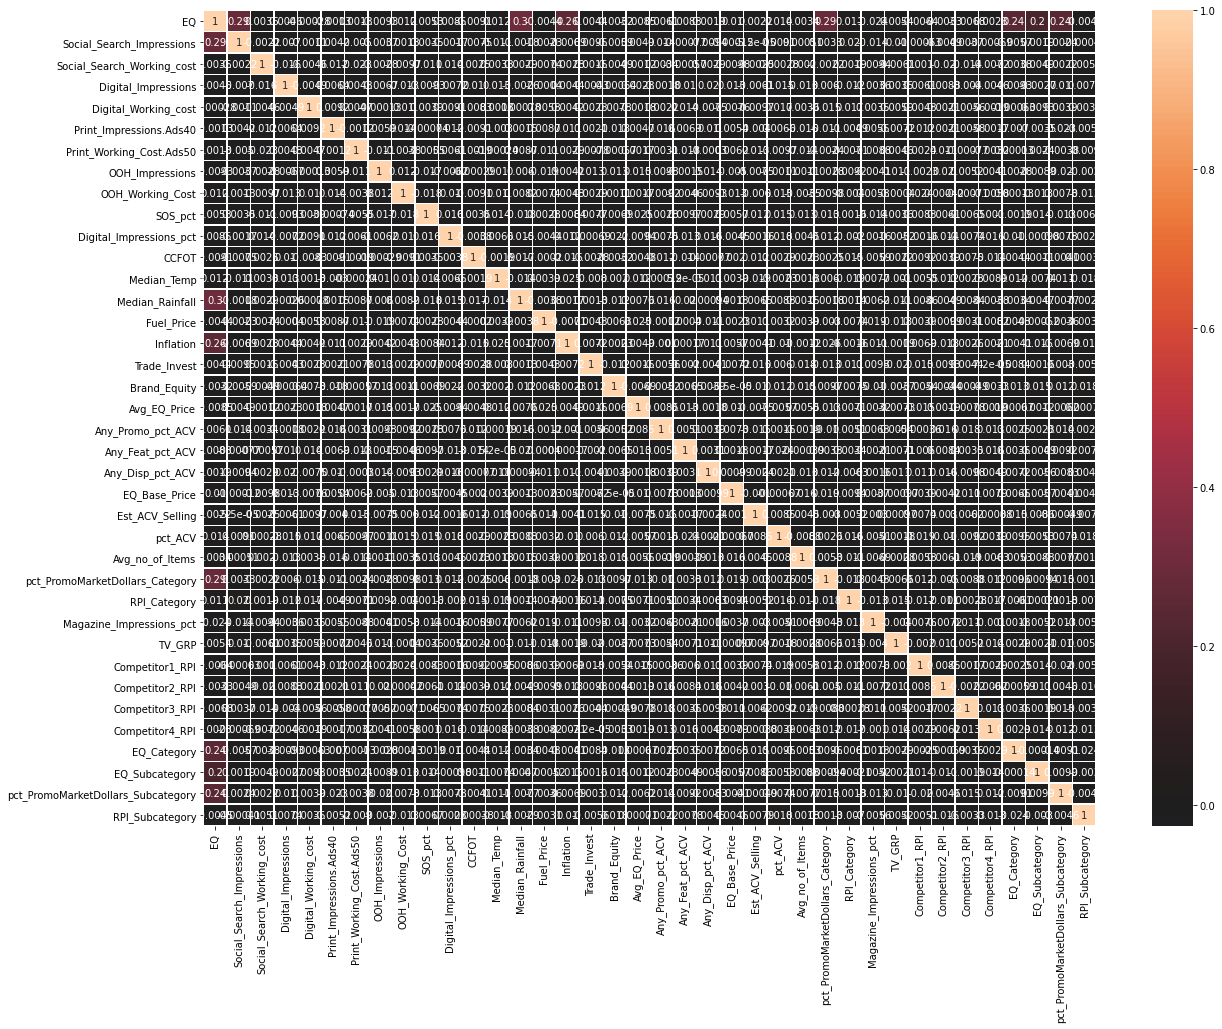

In [12]:
# A HeatMap of Correlation Matrix (Training Data)

plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),
            annot=True,
            linewidths=0.5,
            center=0)
plt.show()

# By using heat map, plotted the correlation matrix but we can see that almost all of the features have no correlation between each other, only few have less correlation. 

# The dataset doesn't have enough/right data to build the model, it may leads to poor model.

In [13]:
#Importing Test DataSet

df1 = pd.read_excel('Test dataset v1.xlsx')
df1 = df1.drop('Period', axis =1)

In [14]:
# Head of the Test Dataset

df1.head()

,EQ,Social_Search_Impressions,Social_Search_Working_cost,Digital_Impressions,Digital_Working_cost,Print_Impressions.Ads40,Print_Working_Cost.Ads50,OOH_Impressions,OOH_Working_Cost,SOS_pct,...,Magazine_Impressions_pct,TV_GRP,Competitor1_RPI,Competitor2_RPI,Competitor3_RPI,Competitor4_RPI,EQ_Category,EQ_Subcategory,pct_PromoMarketDollars_Subcategory,RPI_Subcategory
0,504.784933,2019283.0,5493.0,37148.2,2045.282,0.000012,0.000012,1.203045e+09,2220633.0,7.446883,...,27.702433,21.300,97.173365,35.557371,44.502717,63.377268,1728388.673,331927.5394,0.162732,40.560563
1,490.226477,4564738.0,12938.0,50886.8,2370.584,0.000014,0.000015,1.944356e+09,469895.0,11.677082,...,21.432628,12.334,97.850760,37.223072,45.720077,62.731742,1900859.879,334611.3806,0.231650,40.046301
2,479.244686,1029384.0,6546.0,253333.2,3180.888,0.000016,0.000017,9.984054e+08,4465061.0,0.102858,...,29.726275,23.213,96.397739,40.800563,41.822953,62.090417,2036436.906,387148.3582,0.125394,40.411115
3,489.057428,902938.0,3928.0,3426239.0,13595.398,0.000016,0.000019,3.039816e+09,1031855.0,0.249055,...,30.326275,14.456,98.936519,36.576140,41.578429,63.374358,2113635.013,482489.6740,0.056603,42.213246
4,477.031994,1343454.0,28374.0,552197.8,3983.134,0.000016,0.000019,9.622004e+08,2842722.0,13.338804,...,31.702433,25.300,100.509969,36.032016,42.602412,63.291934,2402211.102,629826.6484,0.065059,43.345578


In [15]:
# Shape of the Test Dataset

df1.shape

(39, 38)

In [16]:
# Basic Informations of the Test Dataset

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 38 columns):
EQ                                    39 non-null float64
Social_Search_Impressions             39 non-null float64
Social_Search_Working_cost            39 non-null float64
Digital_Impressions                   39 non-null float64
Digital_Working_cost                  39 non-null float64
Print_Impressions.Ads40               39 non-null float64
Print_Working_Cost.Ads50              39 non-null float64
OOH_Impressions                       39 non-null float64
OOH_Working_Cost                      39 non-null float64
SOS_pct                               39 non-null float64
Digital_Impressions_pct               39 non-null float64
CCFOT                                 39 non-null float64
Median_Temp                           39 non-null float64
Median_Rainfall                       39 non-null float64
Fuel_Price                            39 non-null float64
Inflation                  

In [17]:
# Checking Nan Values in Test Dataset

df1.isnull().sum()

EQ                                    0
Social_Search_Impressions             0
Social_Search_Working_cost            0
Digital_Impressions                   0
Digital_Working_cost                  0
Print_Impressions.Ads40               0
Print_Working_Cost.Ads50              0
OOH_Impressions                       0
OOH_Working_Cost                      0
SOS_pct                               0
Digital_Impressions_pct               0
CCFOT                                 0
Median_Temp                           0
Median_Rainfall                       0
Fuel_Price                            0
Inflation                             0
Trade_Invest                          0
Brand_Equity                          0
Avg_EQ_Price                          0
Any_Promo_pct_ACV                     0
Any_Feat_pct_ACV                      0
Any_Disp_pct_ACV                      0
EQ_Base_Price                         0
Est_ACV_Selling                       0
pct_ACV                               0


# Test dataset have a shape of (39,38) and it aslo has two dif data types. Test data doen't have any NaN values.

In [18]:
# Five Point Summary of Each Attribute (Test Set)

df1.describe().T

,count,mean,std,min,25%,50%,75%,max
EQ,39.0,3.176075e+02,1.175661e+02,1.309374e+02,2.384726e+02,2.867056e+02,3.889322e+02,5.460531e+02
Social_Search_Impressions,39.0,9.146515e+06,9.651932e+06,2.160000e+04,1.731686e+06,4.564738e+06,1.530694e+07,4.039739e+07
Social_Search_Working_cost,39.0,5.871759e+04,7.981900e+04,2.006674e+03,1.143809e+04,3.403914e+04,8.183857e+04,4.738320e+05
Digital_Impressions,39.0,3.631546e+06,4.162175e+06,2.989220e+04,1.106505e+05,1.909387e+06,5.977302e+06,1.830051e+07
Digital_Working_cost,39.0,5.157072e+04,4.344227e+04,1.800344e+03,1.275527e+04,3.928200e+04,7.642800e+04,1.705078e+05
Print_Impressions.Ads40,39.0,2.021186e+06,3.677723e+06,1.230000e-05,1.666544e-05,2.374541e+03,1.689334e+06,1.205852e+07
Print_Working_Cost.Ads50,39.0,3.414445e+04,6.219642e+04,1.210000e-05,1.998535e-05,4.046469e+02,3.729639e+04,2.397514e+05
OOH_Impressions,39.0,1.812724e+09,1.415378e+09,2.880720e+04,4.189834e+08,1.717025e+09,3.119164e+09,4.438204e+09
OOH_Working_Cost,39.0,2.636554e+06,1.877501e+06,3.505506e+02,1.179309e+06,2.522631e+06,3.787462e+06,8.617309e+06
SOS_pct,39.0,1.143948e+01,1.134080e+01,1.028581e-01,9.899261e-01,9.209103e+00,1.730071e+01,4.744219e+01


In [19]:
#Measure of Skewness of Numerical Attributes

df1.skew(numeric_only = True)

EQ                                    0.294513
Social_Search_Impressions             1.336064
Social_Search_Working_cost            3.898281
Digital_Impressions                   1.498104
Digital_Working_cost                  0.785506
Print_Impressions.Ads40               1.715113
Print_Working_Cost.Ads50              2.054469
OOH_Impressions                       0.183571
OOH_Working_Cost                      0.724984
SOS_pct                               1.126616
Digital_Impressions_pct               0.521163
CCFOT                                -2.018154
Median_Temp                          -0.060064
Median_Rainfall                      -0.101040
Fuel_Price                           -0.136359
Inflation                            -0.350361
Trade_Invest                          1.141401
Brand_Equity                         -0.137770
Avg_EQ_Price                          0.579593
Any_Promo_pct_ACV                    -0.006451
Any_Feat_pct_ACV                      0.486651
Any_Disp_pct_

# As we can see that some of the features are left skewed and some are higly right skewed. Few variables like Any_Promo_pct_ACV, RPI_Subcategory are looks normal.

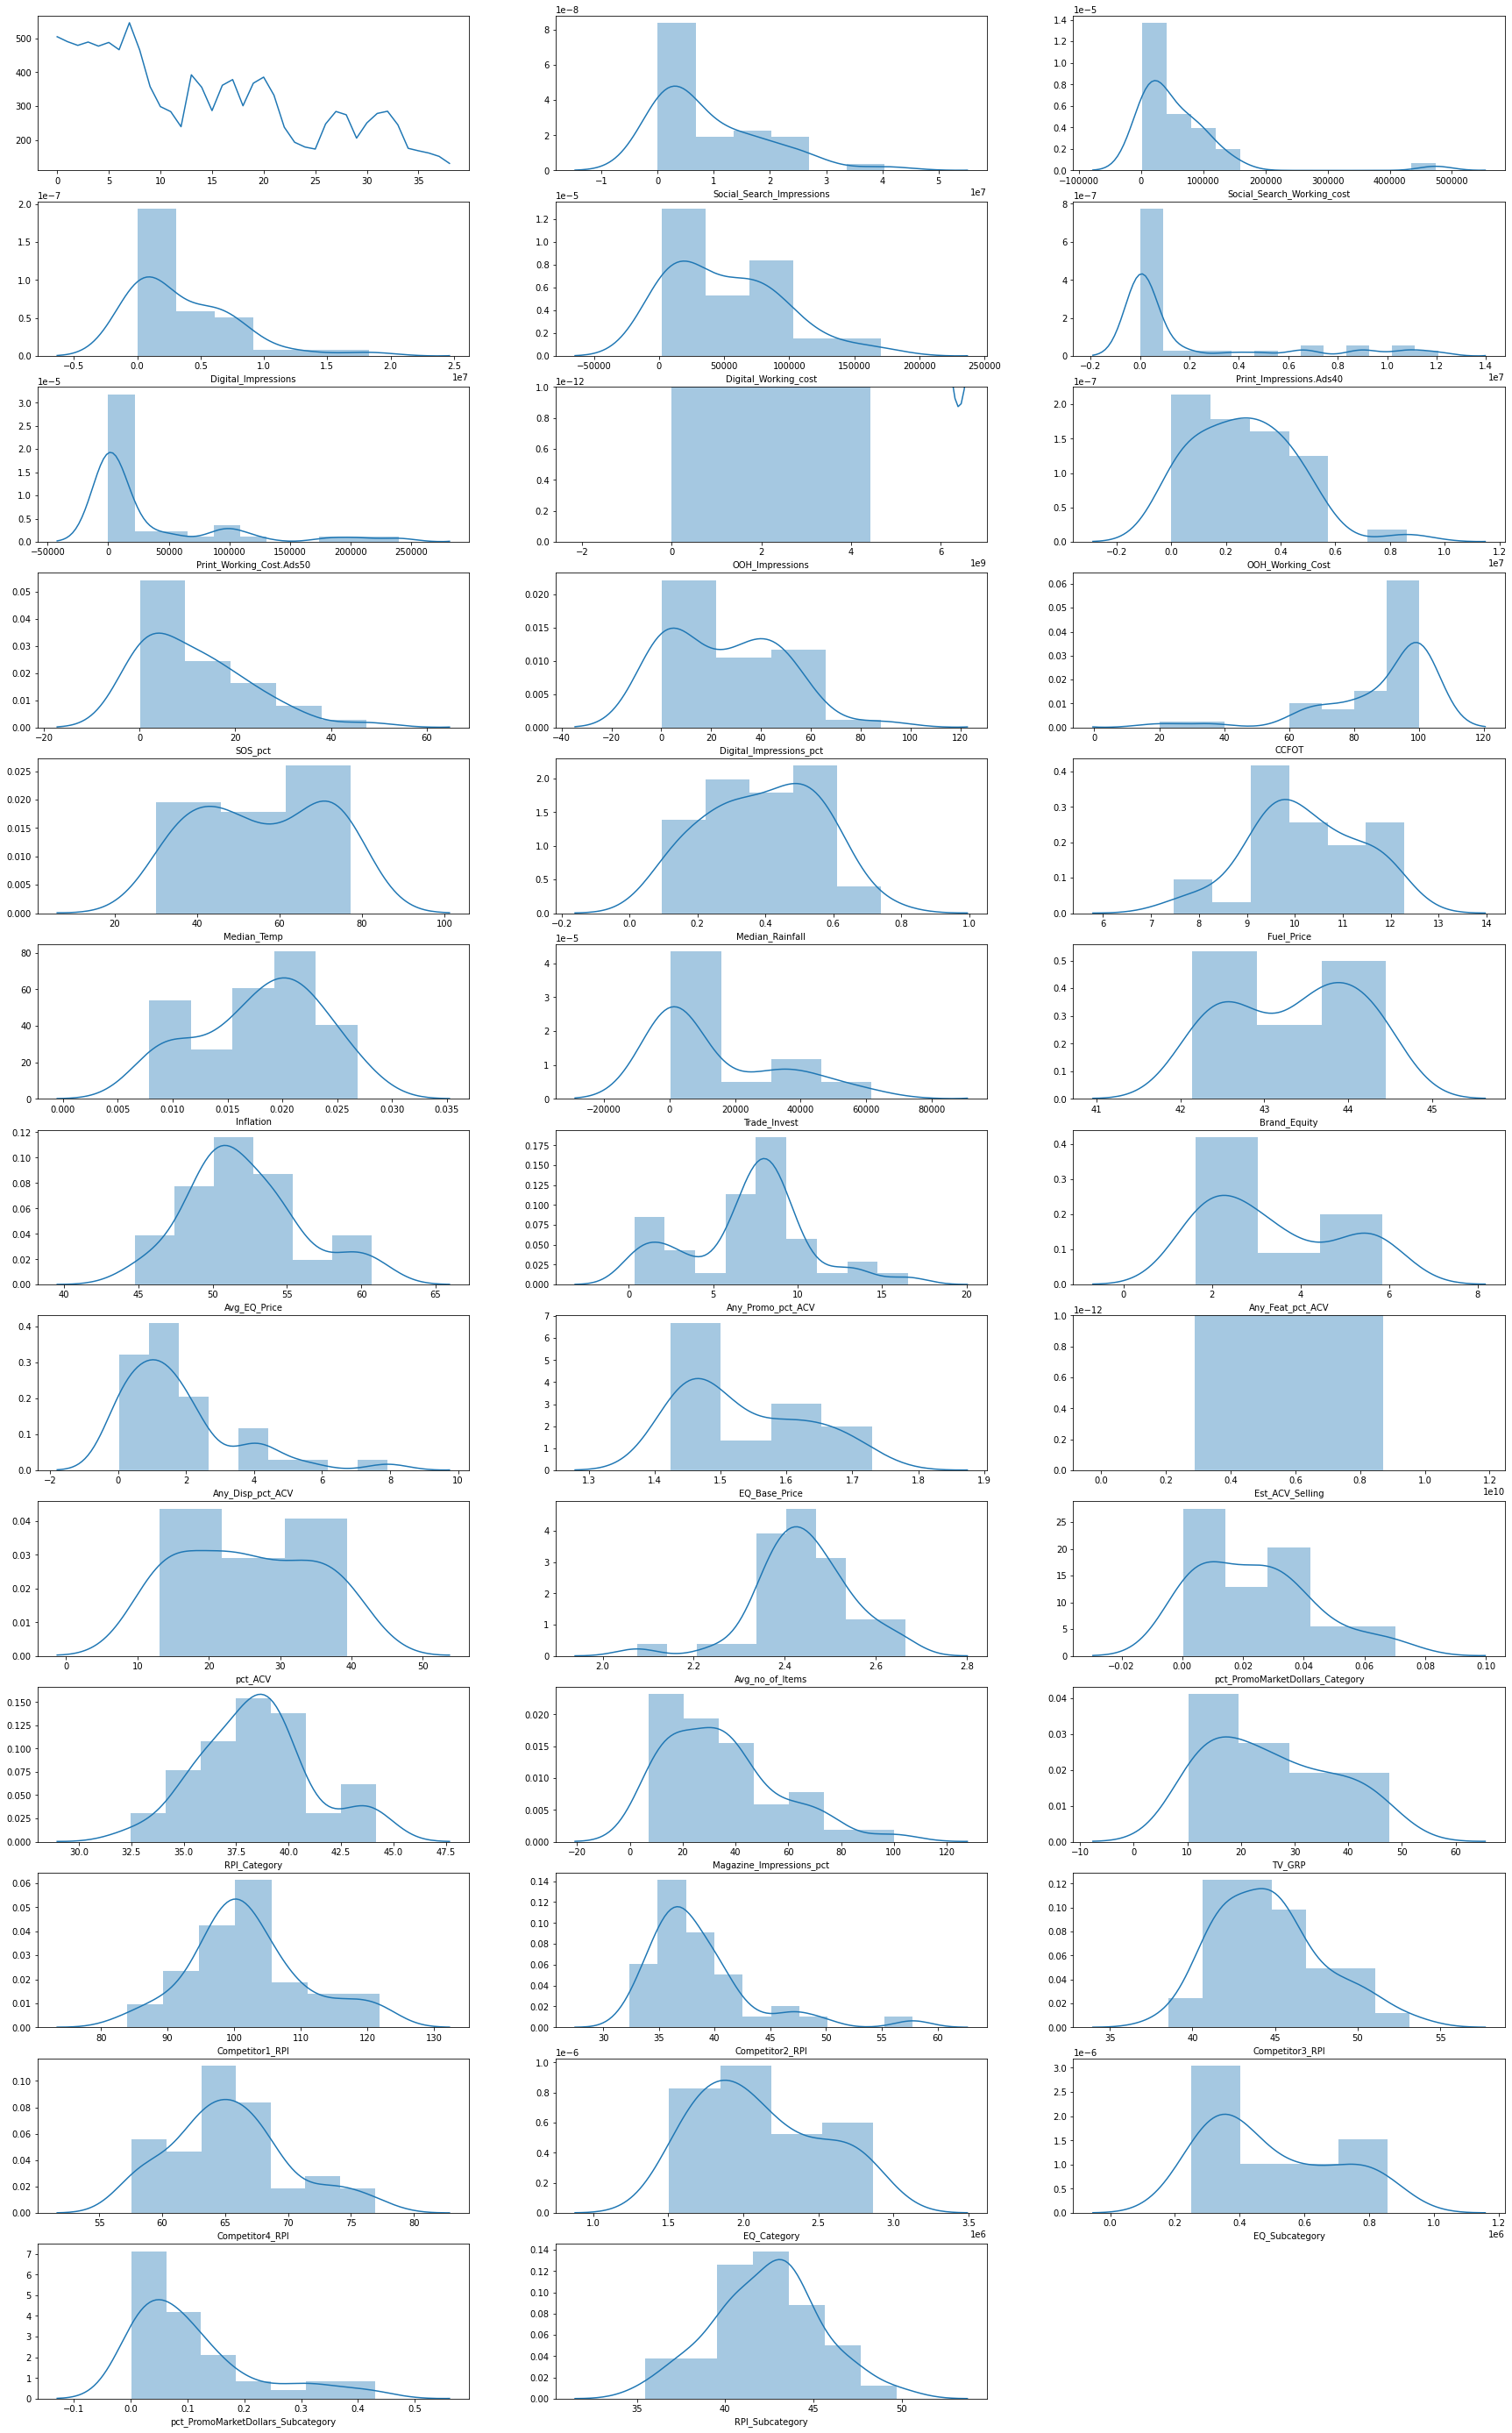

In [20]:
# Univariate Analysis : Visualization of Individual Attributes

plt.figure(figsize= (30,50))  
pos = 1    
for feature in df1.columns:   
    plt.subplot(13, 3, pos)   
    if feature in ['EQ']:   
          plt.plot(df1[feature])
    else:
          sns.distplot(df1[feature], kde= True ) # Plot histogram for all the continuous attributes
    pos +=1  

# We use plot function for target variable and distance plot for independent attributes, to see the distribution of the same.

# Some are having more weights on left tail of distribution and some are having more weights on right tail of skew.

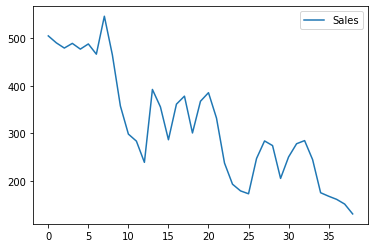

In [21]:
# Plot the Distribution of Target Attribute(TestSet : Sales) 

plt.plot(df1.EQ, label = 'Sales') 
plt.legend()

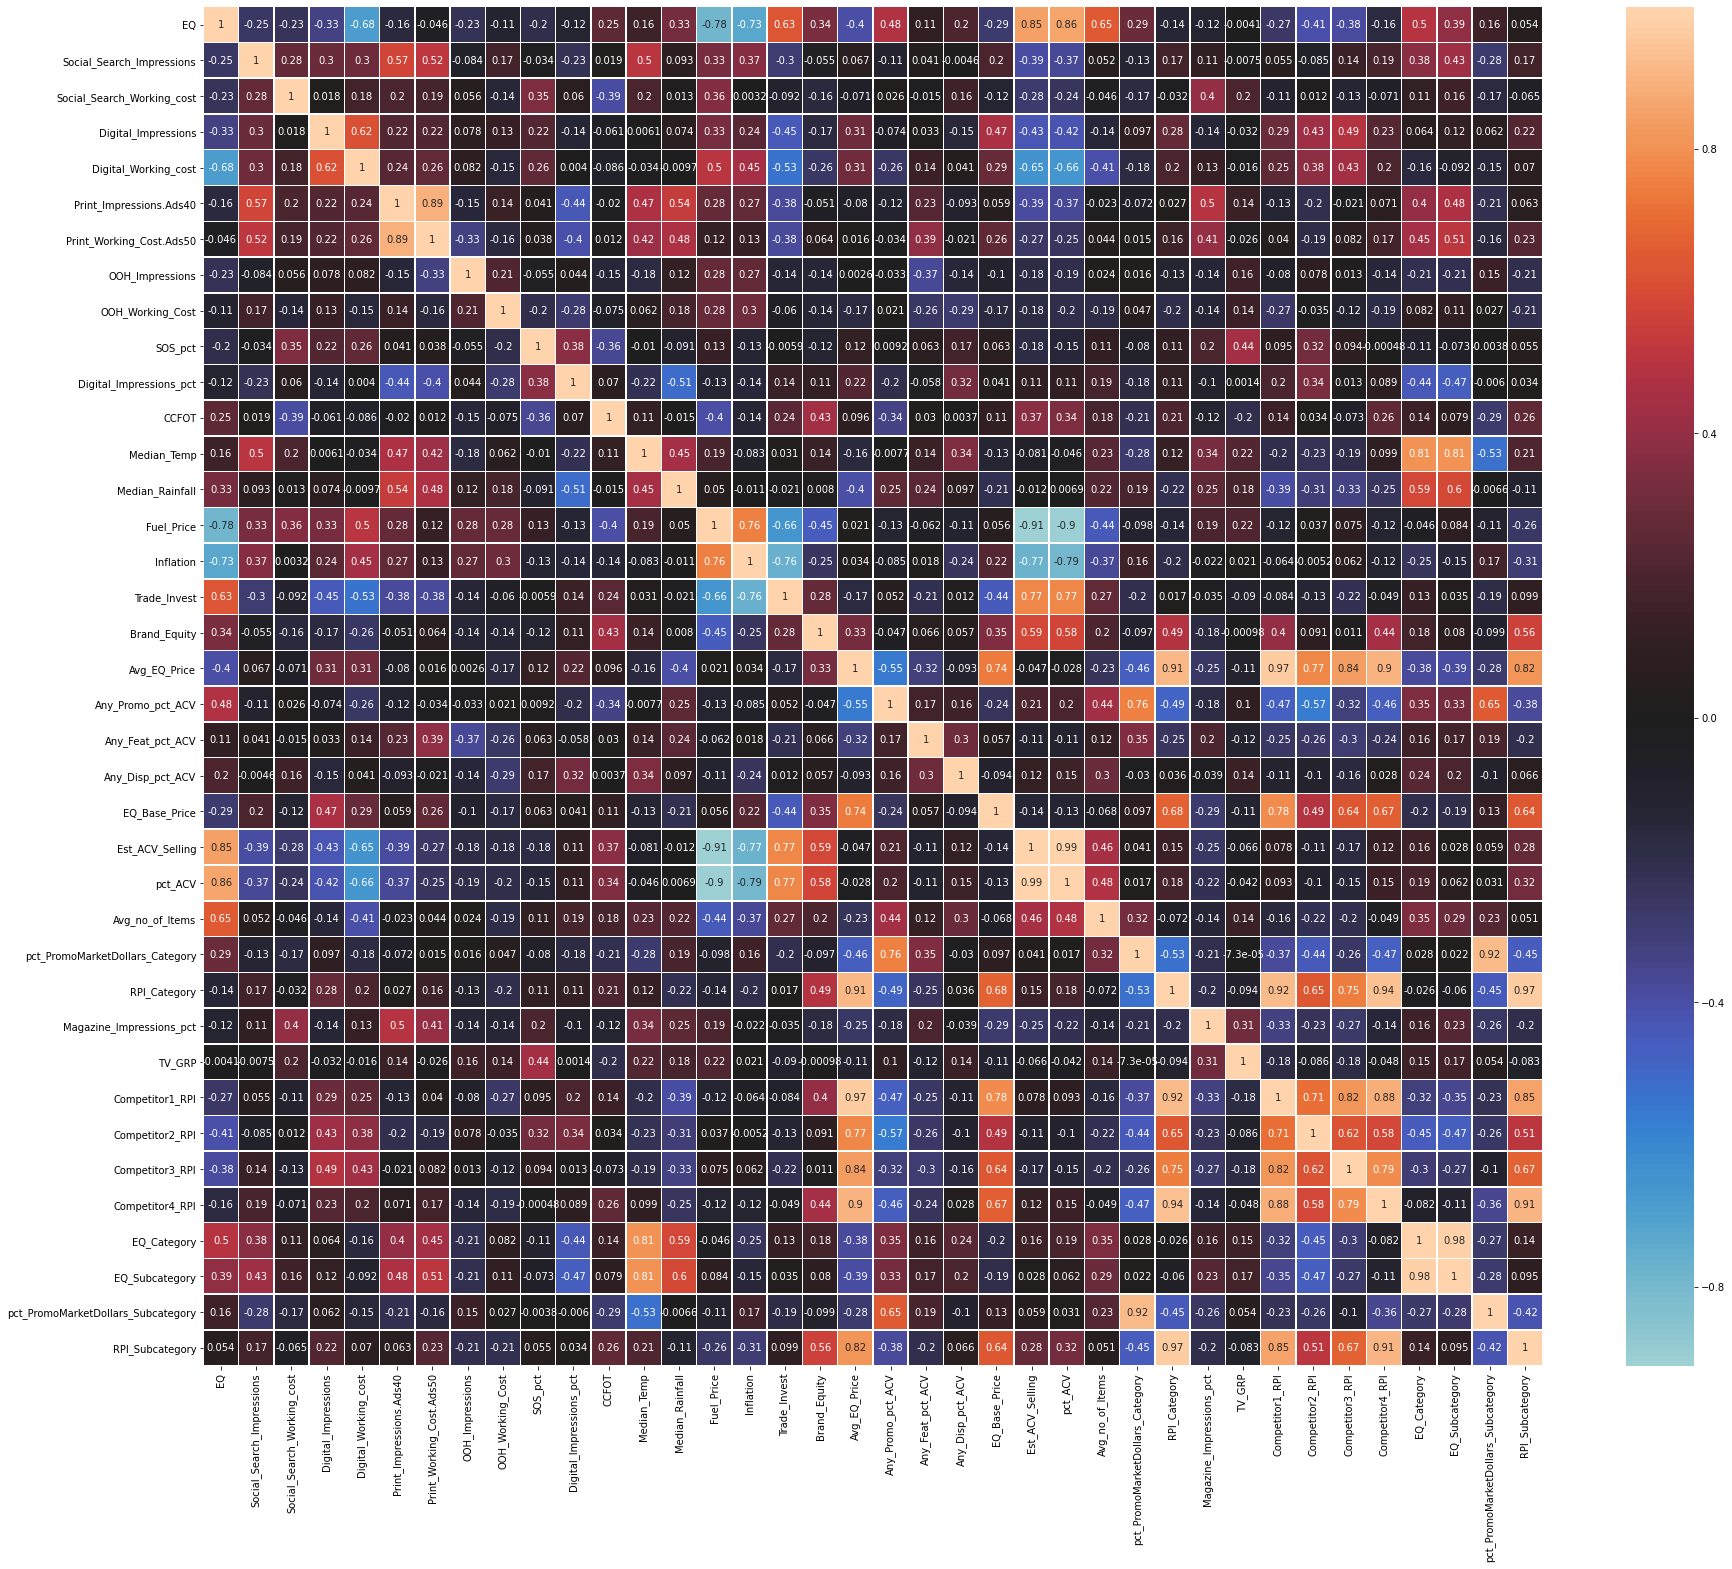

In [22]:
# A HeatMap of Correlation Matrix (Test Data)

plt.figure(figsize=(30,25))
sns.heatmap(df1.corr(),
            annot=True,
            linewidths=0.5,
            center=0)
plt.show()

# When we plot heat map for correlation matrix, we can see that some are having positive and some are having negative correlation.

In [23]:
# Import statsmodels Library

import statsmodels.formula.api as smf 

# Though our training set have very less varaiations, these are the some features having major drivers for sales.

In [24]:
# Bayesian method to find the major drivers for Sales in TrainData

#Checking Each Attributes for Major Drivers

model = smf.ols(formula='EQ ~ Social_Search_Impressions', data=df)
model_fit = model.fit()
regression_adj_rsq = model_fit.rsquared_adj
print(regression_adj_rsq)

model = smf.ols(formula='EQ ~ Median_Rainfall', data=df)
model_fit = model.fit()
regression_adj_rsq = model_fit.rsquared_adj
print(regression_adj_rsq)

model = smf.ols(formula= 'EQ ~ pct_PromoMarketDollars_Category' , data=df)
model_fit = model.fit()
regression_adj_rsq = model_fit.rsquared_adj
print(regression_adj_rsq)

0.08355022452475613
0.09124501050229672
0.0834279345210851


# These're some features which have negative variations which is not good for building a model. As we can see that it's very less and negligible.

In [25]:
#Checking Each Attributes for Major Drivers

model = smf.ols(formula='EQ ~ SOS_pct', data=df)
model_fit = model.fit()
regression_adj_rsq = model_fit.rsquared_adj
print(regression_adj_rsq)

model = smf.ols(formula= 'EQ ~ Competitor1_RPI' , data=df)
model_fit = model.fit()
regression_adj_rsq = model_fit.rsquared_adj
print(regression_adj_rsq)

model = smf.ols(formula= 'EQ ~ TV_GRP' , data=df)
model_fit = model.fit()
regression_adj_rsq = model_fit.rsquared_adj
print(regression_adj_rsq)

model = smf.ols(formula= 'EQ ~ Avg_EQ_Price' , data=df)
model_fit = model.fit()
regression_adj_rsq = model_fit.rsquared_adj
print(regression_adj_rsq)

-5.5296160689888296e-05
-4.188599290100292e-05
-5.368992323795396e-05
-1.0337755218747802e-05


In [26]:
#Let's Check All Features in Training Set Data with Sales 

x1 = df.drop('EQ', axis=1)
y1 = df.iloc[:,0].values

In [27]:
model = smf.ols(formula= 'y1 ~ x1' , data=df)
model_fit = model.fit()
regression_adj_rsq = model_fit.rsquared_adj
print(regression_adj_rsq)

0.483648572653698


# As per above information, all of the features have less variation. It has around 50% of variation in the dataset. Some features are neagtive variation (negligible coz it's very less).

# Our features in the training dataset doesn't explain very well about variations. We're going to build a model with less variations, so the accuracy of the model will be less.

In [28]:
# Define Train and Test Set

train_set, test_set = df.values, df1.values

In [29]:
from sklearn.preprocessing import MinMaxScaler

In [30]:
# Apply Min Max Scaler (Standartization)

scaler = MinMaxScaler()
scaler = scaler.fit(train_set)

In [31]:
# Shape of Train and Test Set

print(train_set.shape,test_set.shape)

(12000, 38) (39, 38)


In [32]:
# Reshape Training Set

train_set = train_set.reshape(train_set.shape[0], train_set.shape[1])
train_set_scaled = scaler.transform(train_set)

# Reshape Test Set

test_set = test_set.reshape(test_set.shape[0], test_set.shape[1])
test_set_scaled = scaler.transform(test_set)

In [33]:
# Define x_train and y_train

x_train, y_train = train_set_scaled[:, 1:], train_set_scaled[:, 0:1]
x_train = x_train.reshape(x_train.shape[0], 1, x_train.shape[1])

In [34]:
# Define x_test and y_test

x_test, y_test = test_set_scaled[:, 1:], test_set_scaled[:, 0:1]
x_test = x_test.reshape(x_test.shape[0], 1, x_test.shape[1])

In [35]:
# Importing Deep Learning Libraries

import keras
import tensorflow
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.layers import LSTM

Using TensorFlow backend.


In [79]:
# Create LSTM and Dense Layers
# Fit and Compile the model

model = Sequential()
model.add(LSTM(4, batch_input_shape=(1,x_train.shape[1], x_train.shape[2]), return_sequences = True, stateful=True))
model.add(LSTM(2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train,epochs=8,batch_size=1,verbose=1, shuffle=False) 

Train on 12000 samples
Epoch 1/8
12000/12000 [==============================] - 53s 4ms/sample - loss: 0.0024 - accuracy: 8.3333e-05
Epoch 2/8
12000/12000 [==============================] - 42s 4ms/sample - loss: 0.0011 - accuracy: 8.3333e-05
Epoch 3/8
12000/12000 [==============================] - 45s 4ms/sample - loss: 8.7413e-04 - accuracy: 1.6667e-04
Epoch 4/8
12000/12000 [==============================] - 47s 4ms/sample - loss: 7.4301e-04 - accuracy: 1.6667e-04
Epoch 5/8
12000/12000 [==============================] - 47s 4ms/sample - loss: 6.5495e-04 - accuracy: 1.6667e-04
Epoch 6/8
12000/12000 [==============================] - 62s 5ms/sample - loss: 5.9121e-04 - accuracy: 1.6667e-04
Epoch 7/8
12000/12000 [==============================] - 46s 4ms/sample - loss: 5.4301e-04 - accuracy: 1.6667e-04
Epoch 8/8
12000/12000 [==============================] - 46s 4ms/sample - loss: 5.0523e-04 - accuracy: 1.6667e-04


In [80]:
#Predicting Test Set Results

y_pred = model.predict(x_test, batch_size = 1)

In [81]:
y_pred

array([[0.02758373],
       [0.02982992],
       [0.02414045],
       [0.03372467],
       [0.02636139],
       [0.02448374],
       [0.03182577],
       [0.03034691],
       [0.029659  ],
       [0.03543542],
       [0.04022314],
       [0.02572966],
       [0.02298424],
       [0.03610163],
       [0.01849075],
       [0.03185983],
       [0.01196286],
       [0.02868199],
       [0.01210333],
       [0.05974966],
       [0.01601105],
       [0.01459366],
       [0.02100395],
       [0.030295  ],
       [0.02015615],
       [0.01425108],
       [0.02130255],
       [0.03101525],
       [0.01045294],
       [0.01314365],
       [0.01191582],
       [0.01811891],
       [0.01978702],
       [0.03675126],
       [0.02662712],
       [0.03149548],
       [0.00842696],
       [0.00336525],
       [0.02288869]], dtype=float32)

In [43]:
y_test

array([[0.02720001],
       [0.02641551],
       [0.02582374],
       [0.02635252],
       [0.02570451],
       [0.02628774],
       [0.02513155],
       [0.02942381],
       [0.02505214],
       [0.01927137],
       [0.01608693],
       [0.01529178],
       [0.01289029],
       [0.02114003],
       [0.01916379],
       [0.01544849],
       [0.01947592],
       [0.02038279],
       [0.01621457],
       [0.01980475],
       [0.02077422],
       [0.01789735],
       [0.01280849],
       [0.01041524],
       [0.00966039],
       [0.00933409],
       [0.0133259 ],
       [0.01531258],
       [0.01478705],
       [0.01107261],
       [0.01350047],
       [0.01499649],
       [0.01535095],
       [0.01319743],
       [0.00945237],
       [0.00905762],
       [0.00870319],
       [0.00817041],
       [0.0070547 ]])

In [82]:
# Reshape Predicted Values

y_pred = y_pred.reshape(y_pred.shape[0],1, y_pred.shape[1])

In [83]:
# Check the Shape

x_train.shape, x_test.shape, y_train.shape,y_test.shape,y_pred.shape

((12000, 1, 37), (39, 1, 37), (12000, 1), (39, 1), (39, 1, 1))

In [84]:
# Rebuild Test Set for Inverse Transform

pred_test_set = []
for index in range(0,len(y_pred)):
    print (np.concatenate([y_pred[index],x_test[index]],axis=1))
    pred_test_set.append(np.concatenate([y_pred[index],x_test[index]],axis=1))

[[ 2.75837313e-02  3.06209772e-02  1.62419187e-02  1.03729760e-03
  -3.37583800e-03 -1.56730997e-01 -2.43251348e-03  1.44488026e+00
   5.64892267e-01  1.31569040e-01  3.06122449e-01  1.00000000e+00
   2.06521739e-02  5.10091521e-01  3.81098732e-01  2.79059964e-02
   4.31731134e+00  0.00000000e+00  3.86470593e-01  5.70458051e-01
   2.50000000e-01  3.64422488e-01  5.75274535e-02  1.29071371e+01
   8.03996997e-01  5.76218892e-01  4.88816371e-02  1.93875000e-02
   1.02259547e-01  2.71515152e-01  1.84771011e-01  2.70115997e-01
   2.45063700e-01  8.42228244e-02  4.48645285e-02  1.78936328e-01
   3.37712717e-01  5.24483609e-01]]
[[ 2.98299231e-02  9.86843942e-02  7.83482795e-02  2.07689556e-03
  -2.61728775e-03 -1.56730997e-01 -2.43251347e-03  2.37733376e+00
   6.62151981e-02  2.17899629e-01  8.16326531e-02  8.59550562e-01
   5.70652174e-02  2.62601774e-01  9.18171341e-02  6.27995035e-05
   3.65761418e+00  0.00000000e+00  3.84567598e-01  5.53641657e-01
   2.50000000e-01  3.64194869e-01  1.137

In [85]:
pred_test_set[0]

array([[ 2.75837313e-02,  3.06209772e-02,  1.62419187e-02,
         1.03729760e-03, -3.37583800e-03, -1.56730997e-01,
        -2.43251348e-03,  1.44488026e+00,  5.64892267e-01,
         1.31569040e-01,  3.06122449e-01,  1.00000000e+00,
         2.06521739e-02,  5.10091521e-01,  3.81098732e-01,
         2.79059964e-02,  4.31731134e+00,  0.00000000e+00,
         3.86470593e-01,  5.70458051e-01,  2.50000000e-01,
         3.64422488e-01,  5.75274535e-02,  1.29071371e+01,
         8.03996997e-01,  5.76218892e-01,  4.88816371e-02,
         1.93875000e-02,  1.02259547e-01,  2.71515152e-01,
         1.84771011e-01,  2.70115997e-01,  2.45063700e-01,
         8.42228244e-02,  4.48645285e-02,  1.78936328e-01,
         3.37712717e-01,  5.24483609e-01]])

In [86]:
# Reshape pred_test_set

pred_test_set = np.array(pred_test_set)
pred_test_set = pred_test_set.reshape(pred_test_set.shape[0], pred_test_set.shape[2])

In [87]:
pred_test_set.shape

(39, 38)

In [88]:
# Inverse Transform of pred_test_set

pred_test_set_inverted = scaler.inverse_transform(pred_test_set)

In [89]:
pred_test_set_inverted

array([[5.11905776e+02, 2.01928300e+06, 5.49300000e+03, ...,
        3.31927539e+05, 1.62731521e-01, 4.05605634e+01],
       [5.53589579e+02, 4.56473800e+06, 1.29380000e+04, ...,
        3.34611381e+05, 2.31649656e-01, 4.00463007e+01],
       [4.48006881e+02, 1.02938400e+06, 6.54600000e+03, ...,
        3.87148358e+05, 1.25393764e-01, 4.04111148e+01],
       ...,
       [1.56403084e+02, 2.85755200e+05, 5.23296800e+03, ...,
        3.29510994e+05, 6.40482631e-03, 4.09552809e+01],
       [6.24702059e+01, 1.67874000e+06, 2.07134580e+04, ...,
        2.72019826e+05, 1.64553649e-01, 3.75547764e+01],
       [4.24777412e+02, 1.58439200e+06, 4.73832000e+05, ...,
        2.49237494e+05, 1.39243177e-01, 3.72973554e+01]])

In [90]:
# Create Dataframe which shows the Predicted Sales

result_list = []
eq =df1.EQ
for index in range(0,len(pred_test_set_inverted)):
    result_dict = {}
    result_dict['Predicted'] = (pred_test_set_inverted[index][0])
    result_list.append(result_dict)
df_result1 = pd.DataFrame(result_list)
df_result1

,Predicted
0,511.905776
1,553.589579
2,448.006881
3,625.866437
4,489.222209
5,454.377555
6,590.627522
7,563.183578
8,550.417688
9,657.613828


In [91]:
y_test1 = df1.EQ
y_test1.shape

(39,)

In [103]:
y_test1 = pd.Series(y_test1, name = 'Actual')
y_test1

0     504.784933
1     490.226477
2     479.244686
3     489.057428
4     477.031994
5     487.855299
6     466.399281
7     546.053084
8     464.925607
9     357.648693
10    298.553287
11    283.797430
12    239.231622
13    392.326431
14    355.652264
15    286.705586
16    361.444714
17    378.273911
18    300.922056
19    367.547047
20    385.537890
21    332.150377
22    237.713584
23    193.300754
24    179.292504
25    173.237305
26    247.315476
27    284.183292
28    274.430757
29    205.499984
30    250.555064
31    278.317524
32    284.895480
33    244.931359
34    175.432319
35    168.106665
36    161.529279
37    151.642231
38    130.937361
Name: Actual, dtype: float64

In [93]:
pd.concat([y_test1,df_result1], axis =1)

,Actual,Predicted
0,504.784933,511.905776
1,490.226477,553.589579
2,479.244686,448.006881
3,489.057428,625.866437
4,477.031994,489.222209
5,487.855299,454.377555
6,466.399281,590.627522
7,546.053084,563.183578
8,464.925607,550.417688
9,357.648693,657.613828


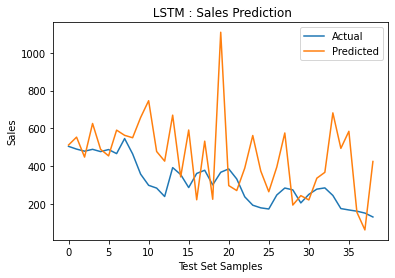

In [94]:
# Plot to compare Actual and Predicted Values

plt.plot(df1.EQ, label= 'Actual')
plt.plot(df_result1, label = 'Predicted')
plt.xlabel('Test Set Samples')
plt.ylabel('Sales')
plt.title(' LSTM : Sales Prediction')
plt.legend()

In [95]:
df2 = pd.read_excel('Training-Data-Sets.xlsx')
df2 = df2.drop('s.no', axis =1)
df2.head()

,EQ,Social_Search_Impressions,Social_Search_Working_cost,Digital_Impressions,Digital_Working_cost,Print_Impressions.Ads40,Print_Working_Cost.Ads50,OOH_Impressions,OOH_Working_Cost,SOS_pct,...,Magazine_Impressions_pct,TV_GRP,Competitor1_RPI,Competitor2_RPI,Competitor3_RPI,Competitor4_RPI,EQ_Category,EQ_Subcategory,pct_PromoMarketDollars_Subcategory,RPI_Subcategory
0,718.458667,22256928,56812,7724107,238700,151438,1044,112229070,2133614,5,...,54.17,16.46,105.71,36.13,46.36,71.83,5420048,475559,0.3766,45.77
1,25.521137,4239408,105695,5844288,188902,264008,113582,284597324,1719318,38,...,65.79,15.64,111.79,43.31,47.58,67.90,12155631,371540,0.2515,35.02
2,268.288044,6708500,87686,13008485,19704,150505,38501,807781054,1569740,9,...,45.08,23.91,110.15,38.26,49.26,72.70,11939870,225984,0.3679,46.22
3,209.071599,36835247,70791,2520814,200111,253458,53719,667441334,922723,9,...,75.24,13.06,116.74,39.37,44.21,73.01,7045541,551342,0.0504,38.10
4,3482.169185,23693467,75610,9276779,65532,278877,95178,74045467,1834970,26,...,56.85,40.72,115.18,36.85,45.46,75.84,11488805,254143,0.2219,39.16


In [96]:
df3 = pd.read_excel('Test dataset v1.xlsx')
df3 = df3.drop('Period', axis =1)
df3.head()

,EQ,Social_Search_Impressions,Social_Search_Working_cost,Digital_Impressions,Digital_Working_cost,Print_Impressions.Ads40,Print_Working_Cost.Ads50,OOH_Impressions,OOH_Working_Cost,SOS_pct,...,Magazine_Impressions_pct,TV_GRP,Competitor1_RPI,Competitor2_RPI,Competitor3_RPI,Competitor4_RPI,EQ_Category,EQ_Subcategory,pct_PromoMarketDollars_Subcategory,RPI_Subcategory
0,504.784933,2019283.0,5493.0,37148.2,2045.282,0.000012,0.000012,1.203045e+09,2220633.0,7.446883,...,27.702433,21.300,97.173365,35.557371,44.502717,63.377268,1728388.673,331927.5394,0.162732,40.560563
1,490.226477,4564738.0,12938.0,50886.8,2370.584,0.000014,0.000015,1.944356e+09,469895.0,11.677082,...,21.432628,12.334,97.850760,37.223072,45.720077,62.731742,1900859.879,334611.3806,0.231650,40.046301
2,479.244686,1029384.0,6546.0,253333.2,3180.888,0.000016,0.000017,9.984054e+08,4465061.0,0.102858,...,29.726275,23.213,96.397739,40.800563,41.822953,62.090417,2036436.906,387148.3582,0.125394,40.411115
3,489.057428,902938.0,3928.0,3426239.0,13595.398,0.000016,0.000019,3.039816e+09,1031855.0,0.249055,...,30.326275,14.456,98.936519,36.576140,41.578429,63.374358,2113635.013,482489.6740,0.056603,42.213246
4,477.031994,1343454.0,28374.0,552197.8,3983.134,0.000016,0.000019,9.622004e+08,2842722.0,13.338804,...,31.702433,25.300,100.509969,36.032016,42.602412,63.291934,2402211.102,629826.6484,0.065059,43.345578


In [97]:
# Spliting Train and Test Set

x_train1, y_train1 = df2.drop('EQ',axis=1), df2['EQ']
x_test1,y_test1 = df3.drop('EQ',axis=1), df3['EQ']

In [98]:
# Standardization of Training Set

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train1 = sc.fit_transform(x_train1) 
x_test1 = sc.fit_transform(x_test1) 

In [99]:
# Create and Fit Support Vector Regressor

from sklearn.svm import SVR
svr = SVR(kernel = 'rbf', C=1.0, epsilon=0.9)
svr.fit(x_train1,y_train1)
svr_pred=svr.predict(x_test1)
svr_pred

array([184.86657806, 162.15635718, 113.65126095,  80.47516359,
       188.06135299, 193.57962017, 180.42847611, 239.66230559,
       239.12249503,  81.31522887, 121.24834035,  11.27060918,
        80.09725587, 309.35942566, 298.11734186, 180.94701935,
       377.59802226, 318.09465964, 229.071655  , 370.94142079,
       343.99962703, 297.91942857, 169.13542575, 167.84671209,
       119.84149925, 156.42145734, 196.04381445, 284.84365821,
       257.51673595, 185.07703585, 330.25203701, 359.63725033,
       325.32945627, 296.90049605, 245.11030885, 132.93349779,
        63.61250496, 147.67632359, 160.29254565])

In [100]:
svr_pred = pd.Series(svr_pred, name = 'Predicted')

In [104]:
pd.concat([y_test1,svr_pred], axis =1)

,Actual,Predicted
0,504.784933,184.866578
1,490.226477,162.156357
2,479.244686,113.651261
3,489.057428,80.475164
4,477.031994,188.061353
5,487.855299,193.579620
6,466.399281,180.428476
7,546.053084,239.662306
8,464.925607,239.122495
9,357.648693,81.315229


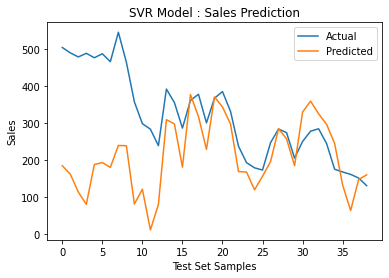

In [102]:
# Plot to compare Actual and Predicted Values

plt.plot(df1.EQ, label= 'Actual')
plt.plot(svr_pred, label = 'Predicted')
plt.xlabel('Test Set Samples')
plt.ylabel('Sales')
plt.title('SVR Model : Sales Prediction')
plt.legend()